In [ ]:
# Copyright (c) Facebook, Inc. and its affiliates.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
def cosine(x, y):
    vectors = torch.tensor(np.stack((x,y), axis=2)).float()
    
    cosine = torch.nn.functional.cosine_similarity(vectors, torch.ones((1,1,2)), dim=2).squeeze()
    
    return cosine

def cosine_activation(x, y):
    vectors = torch.tensor(np.stack((x,y), axis=2)).float()
    
    cosine = torch.nn.functional.cosine_similarity(vectors, torch.ones((1,1,2)), dim=2).squeeze()
    
    return torch.pow(100, cosine - 1)

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)


torch.Size([100, 100])


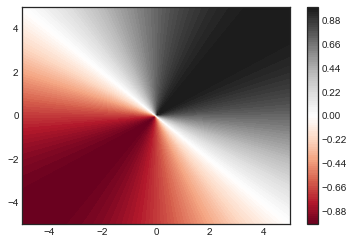

In [6]:
Z = cosine(X, Y)
print(Z.shape)
plt.contourf(X, Y, Z, 100, cmap='RdGy', vmin=-1., vmax=1.);
plt.colorbar();
plt.savefig('cosine_similarity.png', dpi=600)

torch.Size([100, 100])


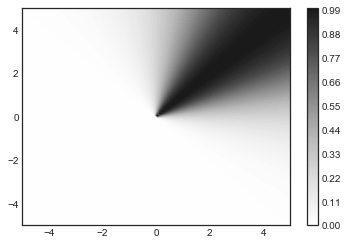

In [7]:
Z = cosine_activation(X, Y)
print(Z.shape)
plt.contourf(X, Y, Z, 100, cmap='RdGy', vmin=-1., vmax=1.);
plt.colorbar();
plt.savefig('gated_cosine_similarity.png', dpi=600)